In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [2]:
path='/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/ADSP_reference_panel/fine_mapping/annotations_dl/aggregate_finemap_v3/'


In [42]:

def read_file(pos, chrom):
    file_anno = ["susie", "baseline", "omics", "omics_dl"]
    dfs = {}
    
    print(f"reading file center at chr{chrom}, bp:{pos}")
    for anno in file_anno:
        df = pd.read_csv(f"{path}bellenguez_{anno}_chr{chrom}.txt.gz", compression='gzip', sep='\t')
        dfs[anno] = df[(df.BP >= pos - 500000) & (df.BP <= pos + 500000)]
        
    return dfs

def plot_pp(pos,chrom,title='',save=True, pip_thres=False):
    dfs=read_file(pos,chrom)
    fig, axes = plt.subplots(2, 2, figsize=(9, 5))
    file_anno = ["susie", "baseline", "omics", "omics_dl"]
    fig.suptitle(title, fontsize=13)

    for ax, prefix in zip(axes.ravel(), dfs):
        df = dfs[prefix] 

        # Plot with custom settings for 'susie' (no fill, only edge color)
        if prefix == "susie":
            sc = ax.scatter(df.BP, df.PIP, marker='o', s=13, facecolors='none', edgecolors='grey')
        else:
            sc = ax.scatter(df.BP, df.PIP, marker='o', s=13, c=df.SNPVAR, cmap='viridis')
        
        texts = []
        for _, row in df[df.PIP > 0.2].iterrows():
             texts.append(ax.text(row.BP, row.PIP, row.SNP, fontsize=8, ha='right', color='black'))
        adjust_text(texts, ax=ax, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle="->", color='grey', lw=0.5))

        ax.set_xlabel("BP")
        ax.set_ylabel("Posterior Inclusion Probability")
        if pip_thres:
            ax.set_ylim((0.1, 1.1))
        else:
            ax.set_ylim((0, 1.1))
        ax.axhline(y=0.95, color='r', linestyle='--', linewidth=1, alpha=0.5)
        ax.set_title(prefix)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    fig.colorbar(sc, cax=cbar_ax, orientation="vertical", label="Prior Causal Probability")
    
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ensure no overlap with subplots
    if save:
        plt.savefig(f'/gpfs/commons/home/tlin/pic/ASHG_24/pip_example/{title}.pdf', format='pdf', bbox_inches='tight')
    
    
    

    plt.show()


reading file center at chr11, bp:86057175


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


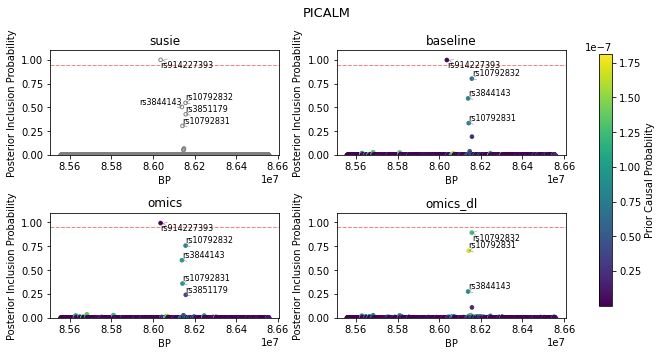

In [40]:
 plot_pp(86057175,11,'PICALM') #hg38 chr11:85,957,175-86,069,084

reading file center at chr11, bp:86057175


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


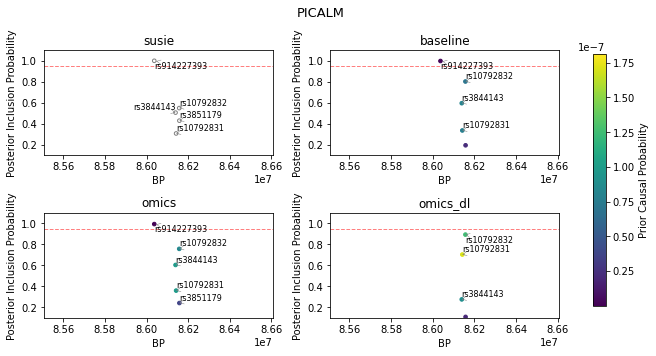

In [43]:
 plot_pp(86057175,11,'PICALM', pip_thres=True)

reading file center at chr3, bp:90308518


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


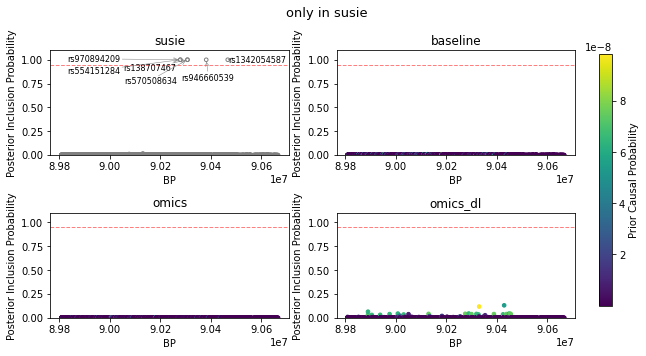

In [5]:
##only susie
plot_pp(90308518,3,'only in susie')

reading file center at chr4, bp:40197226


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


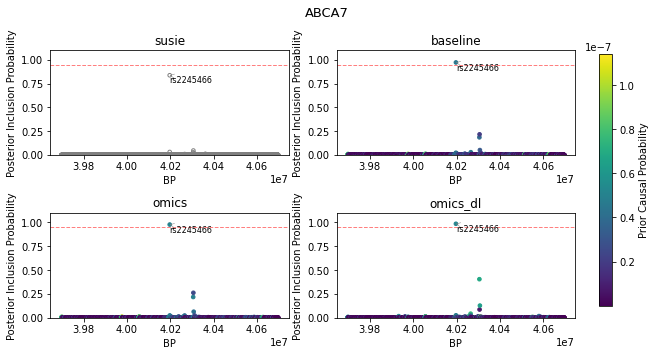

reading file center at chr7, bp:7815748


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


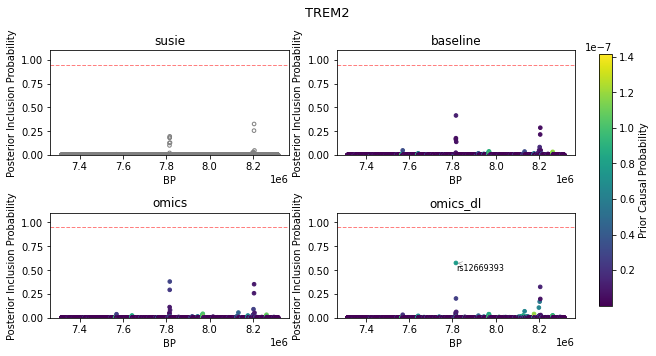

reading file center at chr7, bp:54877227


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


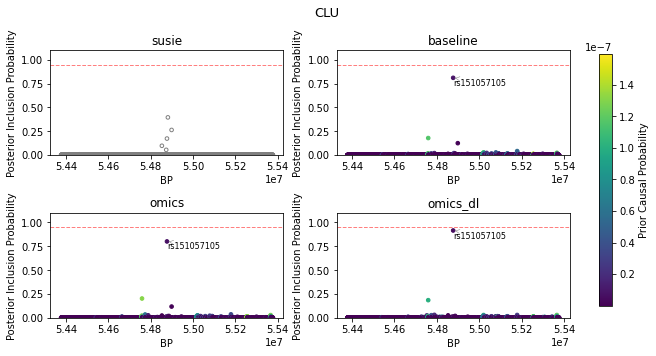

reading file center at chr9, bp:104898848


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


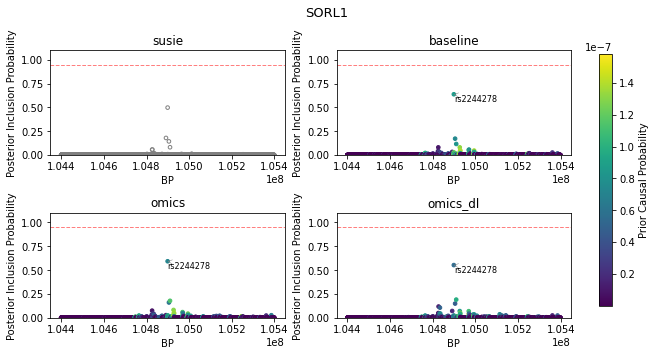

In [6]:
## functional
## ABCA7
plot_pp(40197226,4,'ABCA7')

## TREM2
plot_pp(7815748,7,'TREM2')

## CLU
plot_pp(54877227,7,'CLU')

## SORL1
plot_pp(104898848,9,'SORL1')


In [84]:
sorl1

<module 'matplotlib.pyplot' from '/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/matplotlib/pyplot.py'>

reading file center at chr8, bp:11808828


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


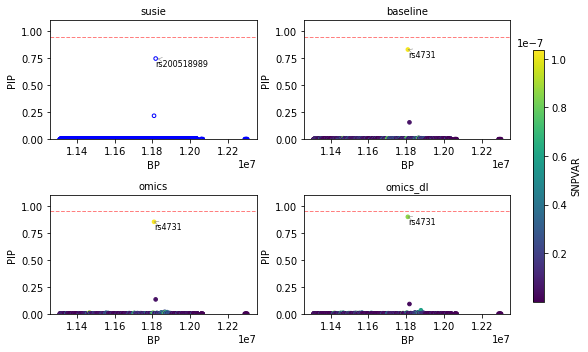

reading file center at chr17, bp:58332680


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


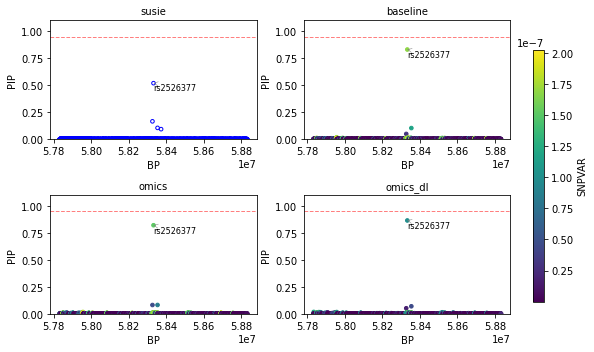

reading file center at chr17, bp:64778608


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


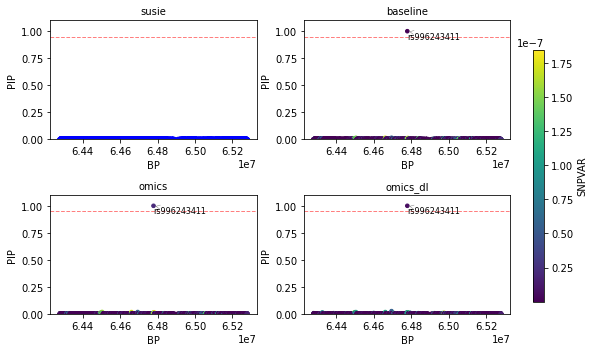

reading file center at chr19, bp:46653831


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


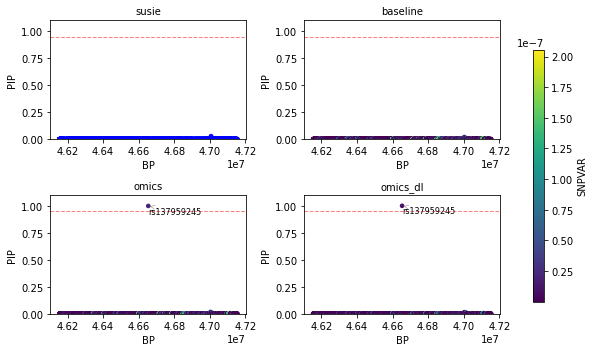

reading file center at chr20, bp:408274


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


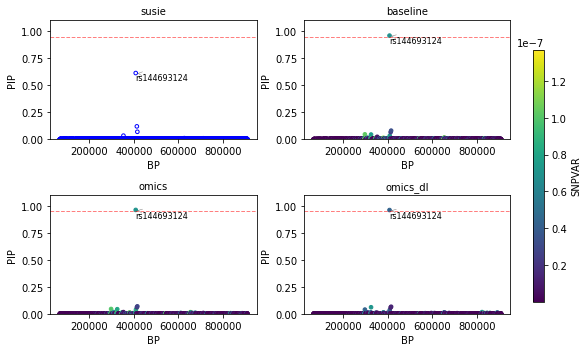

In [64]:
plot_pp(11808828,8)
plot_pp(58332680,17)
plot_pp(64778608,17)
plot_pp(46653831,19)
plot_pp(408274,20)

In [31]:
gene_range=pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/eQTL/microglia/gene_range.tsv',header=None, sep=' ')
gene_range.columns = ['gene', 'chr', 'range']

In [32]:
print(gene_range.isnull().sum())
gene_range.dropna(subset=['chr', 'range'], inplace=True)
gene_range.chr = gene_range.chr.astype(int)
gene_range.range=gene_range.range.astype(int)

gene     0
chr      1
range    1
dtype: int64


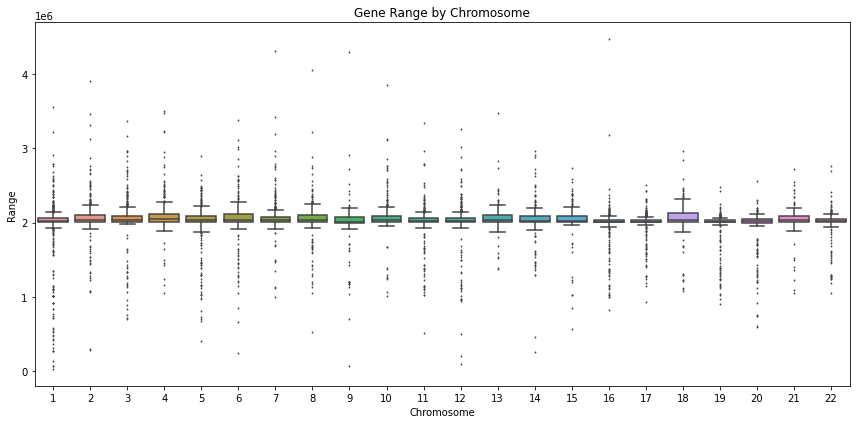

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='chr', y='range', data=gene_range,fliersize=1)
plt.title('Gene Range by Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Range')
plt.xticks()
plt.tight_layout()
plt.show()